# Reinforcement Learning

# 1. Markov Decision Process

This notebook presents some examples of Markov Decison Processes, where an **agent** interacts with its **environment** and collects **rewards**. 

In all considered models, rewards are attached to reached **states**. In games for instance, the reward of a state is +1 if you win, -1 if you loose, 0 in all other cases.

In [1]:
import numpy as np

In [2]:
from model import Walk, Maze

Each model is an object of the class ``Environment`` storing the current state. 

In [3]:
from model import Environment

In [16]:
methods_environment = [method for method in dir(Environment) if '__' not in method]

In [17]:
methods_environment

['decode',
 'display',
 'encode',
 'get_actions',
 'get_all_actions',
 'get_all_states',
 'get_model',
 'get_reward',
 'get_transition',
 'init_state',
 'is_game',
 'is_terminal',
 'reset',
 'show',
 'step']

The agent interacts with the environment and collects rewards.

In [4]:
from agent import Agent

In [19]:
methods_agent = [method for method in dir(Agent) if '__' not in method]

In [20]:
methods_agent

['get_action',
 'get_actions',
 'get_episode',
 'get_gains',
 'one_step_policy',
 'random_policy']

## Walk

We start with a walk in a square. Some states (to be found) have positive rewards. Some wind (unknown) disturbs the walk.

In [21]:
# environment
model = Walk()

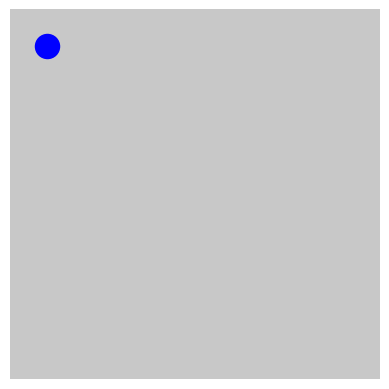

In [22]:
model.display()

In [23]:
model.Size

(5, 5)

In [24]:
# rewards (to be discovered)
model.Rewards

{(1, 1): 1, (1, 3): -1, (3, 1): -1, (3, 3): 3}

In [25]:
# wind (move probabilities due to wind)
model.Wind

{(0, 1): 0.1, (1, 0): 0.2}

In [26]:
state = model.state

In [27]:
state

array([0, 0])

In [28]:
model.get_actions(state)

[(0, 1), (1, 0)]

In [29]:
action = (0, 1)

In [30]:
model.step(action)

(0, False)

In [31]:
model.state

array([0, 1])

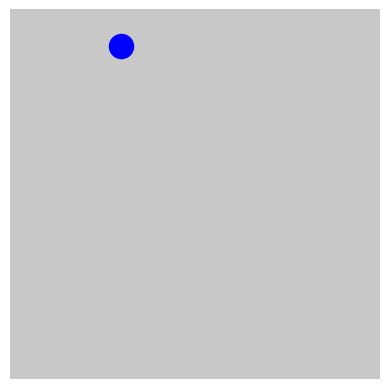

In [32]:
model.display()

In [33]:
# agent with random policy (default)
agent = Agent(model)

In [34]:
state = model.state
action = agent.get_action(state)

In [35]:
state

array([0, 1])

In [36]:
action

(1, 0)

In [37]:
# interaction with the environment
reward, stop = model.step(action)

In [38]:
reward

1

In [39]:
stop

False

In [40]:
# all possible actions
agent.get_actions(state)

[(0, 1), (0, -1), (1, 0)]

In [41]:
# policy of the agent
probs, actions = agent.policy(state)

In [42]:
print(probs)

[0.33333333 0.33333333 0.33333333]


In [43]:
print(actions)

[(0, 1), (0, -1), (1, 0)]


In [44]:
# an episode
stop, states, rewards = agent.get_episode(horizon=50)

In [45]:
# the episode includes the initial state
len(states)

51

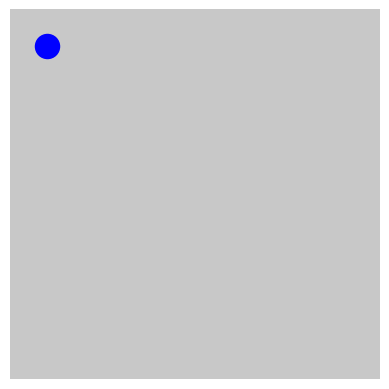

In [46]:
# display
animation = model.display(states)

In [47]:
animation

In [48]:
# initial reward = 0 by convention
len(rewards)

50

In [49]:
np.sum(rewards)

13

In [50]:
# gains from initial state, with discount factor
gains = agent.get_gains(n_runs=10, horizon=100, gamma=0.9)

In [51]:
np.mean(gains)

1.7620403028896772

## To do

* Test the weighted random policy where the probability of each move is proportional to its weight.
* Is this policy better than the (pure) random policy?

In [52]:
weights = {(0, 1): 2, (1, 0): 2, (0, -1): 1, (-1, 0): 1}

In [53]:
def weighted_random_policy(state, weights=weights):
    """Weighted random policy. 
    Each action is selected in proportion to its weight. 
    If the weights of available actions are all zero, take uniform choice among these actions."""
    actions = Walk().get_actions(state)
    probs = np.array([weights[action] for action in actions])
    if np.sum(probs):
        probs = probs / np.sum(probs)
    else:
        probs = np.ones(len(actions)) / len(actions)
    return probs, actions

In [54]:
agent = Agent(model, policy=weighted_random_policy)

In [55]:
gains = agent.get_gains(n_runs=10, horizon=100, gamma=0.9)

In [56]:
np.mean(gains)

1.218876079420132

## Maze

Now let's try to escape a maze!

In [ ]:
maze_map = np.load('maze.npy')

In [ ]:
init_state = (1, 0)
exit_state = (1, 20)
Maze.set_parameters(maze_map, init_state, [exit_state])

In [ ]:
model = Maze()

In [ ]:
model.display()

In [ ]:
model.state

In [ ]:
state = model.state
reward = model.get_reward(state)

In [ ]:
# -1 in any state except the exit
reward

In [ ]:
model.get_actions(state)

In [ ]:
action = (0, 1)

In [ ]:
model.step(action)

In [ ]:
model.display()

In [ ]:
# agent with random policy
agent = Agent(model)

In [ ]:
stop, states, rewards = agent.get_episode(horizon=200)

In [ ]:
animation = model.display(states)

In [ ]:
animation

In [ ]:
# time in the Maze
-np.sum(rewards)

## To do

* Test the weighted random policy.
* Are there weights for which you can escape the maze in less than 250 steps?

In [ ]:
model = Maze()

In [ ]:
# bias to the right
weights = {(0, 1): 5, (1, 0): 2, (-1, 0): 2, (0, -1): 1}

In [ ]:
def weighted_random_policy(state, weights=weights):
    """Weighted random policy. 
    Each action is selected in proportion to its weight. 
    If the weights of available actions are all zero, take uniform choice among these actions."""
    actions = Maze().get_actions(state)
    probs = np.array([weights[action] for action in actions])
    if np.sum(probs):
        probs = probs / np.sum(probs)
    else:
        probs = np.ones(len(actions)) / len(actions)
    return probs, actions

In [ ]:
agent = Agent(model)

In [ ]:
horizon = 250

In [ ]:
gains = agent.get_gains(n_runs=100, horizon=horizon)

In [ ]:
# times to escape
times = -np.array(gains) + 1

In [ ]:
np.mean(times < horizon)

In [ ]:
agent = Agent(model, policy=weighted_random_policy)

In [ ]:
stop, states, rewards = agent.get_episode(horizon=200)

In [ ]:
animation = model.display(states)

In [ ]:
animation

In [ ]:
gains = agent.get_gains(n_runs=100, horizon=horizon)

In [ ]:
# times to escape
times = -np.array(gains) + 1

In [ ]:
np.mean(times < horizon)

## Games

Finally, let's play games!<br>
Note that in most games:
* you play against an adversary (which is part of the environment),
* you may play first or second,
* when your adversary plays, you have only one possible action (let your adversary play),
* you can also impose an action to your adversary (useful for training).

We here consider [Tic-Tac-Toe](https://en.wikipedia.org/wiki/Tic-tac-toe), [Nim](https://en.wikipedia.org/wiki/Nim), [Connect Four](https://en.wikipedia.org/wiki/Connect_Four) and [Five in a row](https://en.wikipedia.org/wiki/Gomoku).
Feel free to add more :-)

In [5]:
from model import TicTacToe, Nim, ConnectFour, FiveInRow

Each game is an object of the class ``Game``. 

In [6]:
from model import Game

In [7]:
methods_game = [method for method in dir(Game) if '__' not in method]

In [8]:
methods_game

['Board_Size',
 'decode',
 'display',
 'encode',
 'get_actions',
 'get_all_actions',
 'get_all_states',
 'get_available_actions',
 'get_model',
 'get_next_state',
 'get_reward',
 'get_transition',
 'init_state',
 'is_game',
 'is_terminal',
 'reset',
 'show',
 'step']

The method ``get_next_state`` allows you to get the next state for any (state, action) pair, without modifying the current state. This will be useful to learn good policies.

The method ``get_available_actions`` gives the available actions, ignoring the player.

In [12]:
set(methods_game) - set(methods_environment)

{'Board_Size', 'get_available_actions', 'get_next_state'}

## Tic-Tac-Toe

We start with Tic-Tac-Toe.

### Play first

In [7]:
# game against a random player (default)
game = TicTacToe()

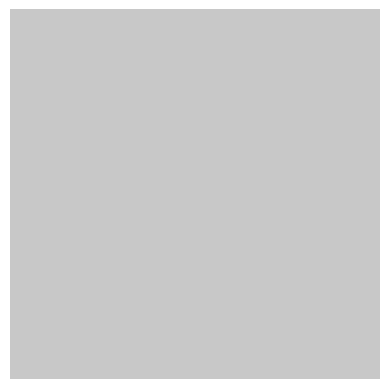

In [8]:
game.display()

In [9]:
# next player, board
game.state

(1,
 array([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]))

In [10]:
# your actions
game.get_actions(game.state)

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]

In [11]:
# next state given some move
game.get_next_state(game.state, (1, 1))

(-1,
 array([[0, 0, 0],
        [0, 1, 0],
        [0, 0, 0]]))

In [12]:
# the state is not modified
game.state

(1,
 array([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]))

In [13]:
# you play at random (default)
agent = Agent(game)

In [14]:
# you play as player 1 (default)
agent.player

1

In [15]:
# your adversary plays as player -1
game.adversary.player

-1

In [16]:
state = game.state
action = agent.get_action(state)

In [17]:
action

(2, 0)

In [18]:
reward, stop = game.step(action)

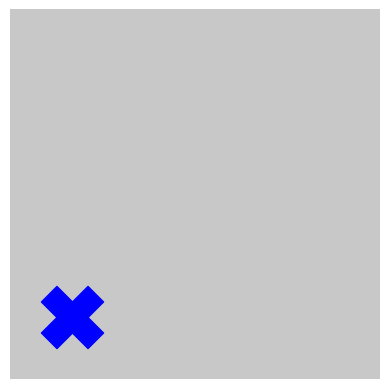

In [19]:
# you're blue
game.display()

In [20]:
game.state

(-1,
 array([[0, 0, 0],
        [0, 0, 0],
        [1, 0, 0]]))

In [21]:
# all possible moves
game.get_available_actions(game.state)

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 1), (2, 2)]

In [22]:
# your moves (not your turn)
agent.get_actions(game.state)

[None]

In [23]:
action = agent.get_action(game.state)

In [24]:
reward, stop = game.step(action)

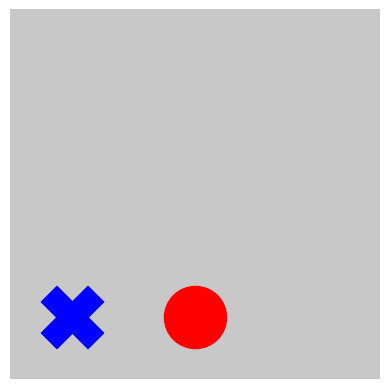

In [25]:
game.display()

In [26]:
stop, states, rewards = agent.get_episode()

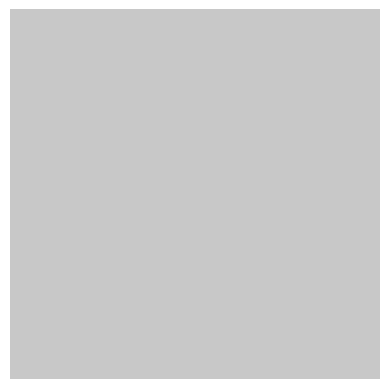

In [27]:
animation = game.display(states)

In [28]:
animation

In [29]:
rewards

[0, 0, 0, 0, 0, 0, 0, 0, 1]

In [30]:
gains = agent.get_gains()
np.unique(agent.get_gains(), return_counts=True)

(array([-1,  0,  1]), array([30,  9, 61], dtype=int64))

### Play second

In [ ]:
# your adversary starts
game = TicTacToe(play_first=False)

In [ ]:
game.first_player

In [ ]:
# you still play at random
agent = Agent(game)

In [ ]:
stop, states, rewards = agent.get_episode()

In [ ]:
animation = game.display(states)

In [ ]:
# you're still blue, red starts
animation

In [ ]:
rewards

In [ ]:
gains = agent.get_gains()
np.unique(agent.get_gains(), return_counts=True)

### Control your adversary

You can force the actions of your adversary (useful for training).

In [37]:
game = TicTacToe()

In [38]:
actions = [(0, 0), (1, 1), (0, 2),  (2, 2), (0, 1)]

In [39]:
for action in actions:
    game.step(action)

In [40]:
game.show()

|XXX|
| O |
|  O|


### One step ahead

In [31]:
# your adversary is random
game = TicTacToe()

In [32]:
# you play with one-step ahead policy
agent = Agent(game, policy='one_step')

In [33]:
stop, states, rewards = agent.get_episode()

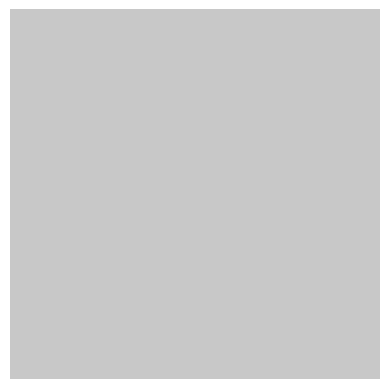

In [34]:
animation = game.display(states)

In [35]:
animation

In [36]:
gains = agent.get_gains()
np.unique(agent.get_gains(), return_counts=True)

(array([-1,  0,  1]), array([ 2,  8, 90], dtype=int64))

In [47]:
# your adversary also looks one-step ahead
game = TicTacToe(adversary_policy='one_step')
agent = Agent(game, policy='one_step')
stop, states, rewards = agent.get_episode()
np.unique(agent.get_gains(), return_counts=True)

(array([-1,  0,  1]), array([20, 51, 29], dtype=int64))

In [37]:
# your adversary also looks one-step ahead
game = TicTacToe(adversary_policy='one_step')

In [38]:
agent = Agent(game, policy='one_step')

In [39]:
stop, states, rewards = agent.get_episode()

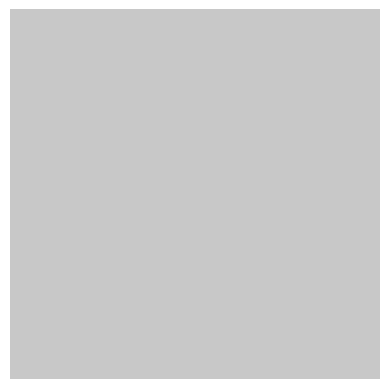

In [40]:
animation = game.display(states)

In [41]:
animation

In [45]:
np.unique(agent.get_gains(), return_counts=True)

(array([-1,  0,  1]), array([21, 47, 32], dtype=int64))

In [43]:
np.mean(agent.get_gains())

0.09

## Nim

### Random players

In [53]:
# game against a random player (default)
game = Nim()

In [54]:
game.state

(1, array([1, 3, 5, 7]))

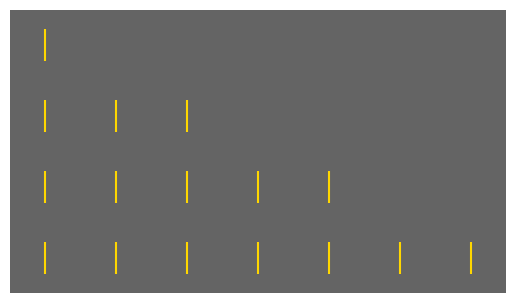

In [55]:
game.display()

In [56]:
# player, board
game.state

(1, array([1, 3, 5, 7]))

In [57]:
# you play at random
agent = Agent(game)

In [58]:
state = game.state
action = agent.get_action(state)

In [59]:
action

(2, 1)

In [60]:
reward, stop = game.step(action)

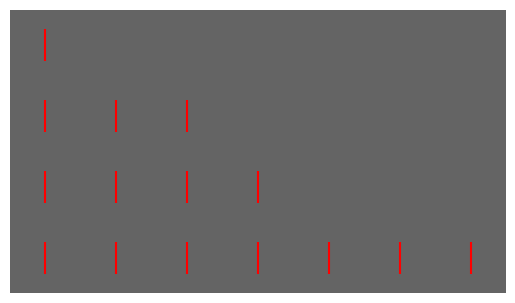

In [61]:
game.display()

In [ ]:
stop, states, rewards = agent.get_episode()

In [ ]:
animation = game.display(states)

In [ ]:
animation

In [ ]:
rewards

In [ ]:
np.unique(agent.get_gains(), return_counts=True)

### One step ahead

In [ ]:
game = Nim(adversary_policy='one_step')

In [ ]:
agent = Agent(game, policy='one_step')

In [ ]:
np.unique(agent.get_gains(), return_counts=True)

## Connect Four

### Random players

In [ ]:
# game against a random player
game = ConnectFour()

In [ ]:
game.display()

In [ ]:
game.state

In [ ]:
# you play at random
agent = Agent(game)

In [ ]:
stop, states, rewards = agent.get_episode()

In [ ]:
animation = game.display(states)

In [ ]:
# you play yellow
animation

In [ ]:
np.unique(agent.get_gains(n_runs=10), return_counts=True)

### One step ahead

In [ ]:
game = ConnectFour(adversary_policy='one_step')

In [ ]:
agent = Agent(game, policy='one_step')

In [ ]:
stop, states, rewards = agent.get_episode()

In [ ]:
animation = game.display(states)

In [ ]:
animation

In [ ]:
np.unique(agent.get_gains(n_runs=10), return_counts=True)

## Five-in-a-row

### Random players

In [ ]:
game = FiveInRow()

In [ ]:
game.display()

In [ ]:
agent = Agent(game)

In [ ]:
stop, states, rewards = agent.get_episode()

In [ ]:
animation = game.display(states)

In [ ]:
animation

In [ ]:
np.unique(agent.get_gains(n_runs=5), return_counts=True)

### One step ahead

In [ ]:
game = FiveInRow()

In [ ]:
agent = Agent(game, policy='one_step')

In [ ]:
np.unique(agent.get_gains(n_runs=5), return_counts=True)

## Value function

The value function of a policy can be computed from Bellman's equation, provided the state space is not too large.

You can check this condition by listing all states.

In [ ]:
model = Walk()

In [ ]:
len(model.get_all_states())

## To do

* Evaluate the random policy in the ``Walk`` model and display the value function.
* Observe the impact of the wind on the value function.
* Display the value function of the random policy in the maze.

In [ ]:
# we use sparse transition matrices
from scipy import sparse

In [ ]:
class PolicyEvaluation:
    """Evaluation of a policy by dynamic programming.
    
    Parameters
    ----------
    model: object of class Environment
        Model.
    policy: function
        Policy of the agent.
    player: int
        Player for games (1 or -1, default = default player of the game).
    gamma: float
        Discount factor (between 0 and 1).
    n_eval: int
        Number of iterations of Bellman's equation for policy evaluation.
    """
    def __init__(self, model, policy='random', player=None, gamma=1, n_eval=100):
        self.model = model
        agent = Agent(model, policy, player)
        self.policy = agent.policy
        self.player = agent.player
        self.gamma = gamma
        self.n_eval = n_eval
        self.index_states()
        if self.n_states == 0:
            raise ValueError("Not applicable. The state space is too large.")
        self.get_rewards()
        self.get_transitions()
        
    def index_states(self):
        """Index all states."""
        self.states = self.model.get_all_states()
        self.n_states = len(self.states)
        self.state_id = {self.model.encode(state): i for i, state in enumerate(self.states)}
        
    def get_state_id(self, state):
        return self.state_id[self.model.encode(state)]

    def get_rewards(self):
        """Get the reward of each state."""
        rewards = np.zeros(self.n_states)
        for i, state in enumerate(self.states):    
            rewards[i] = self.model.get_reward(state)
        self.rewards = rewards
        
    def get_actions(self, state, player=None):
        if self.model.is_game():
            if player is None:
                player = self.player
            actions = self.model.get_actions(state, player)
        else:
            actions = self.model.get_actions(state)
        return actions
    
    def get_transitions(self):
        """Get the transitions (probabilities to move from one state to another) for each action."""
        actions = self.model.get_all_actions()
        transitions = {action: sparse.lil_matrix((self.n_states, self.n_states)) for action in actions}
        for i, state in enumerate(self.states):    
            actions = self.get_actions(state)
            for action in actions:
                probs, next_states = self.model.get_transition(state, action)
                indices = np.array([self.get_state_id(next_state) for next_state in next_states])
                transitions[action][i, indices] = np.array(probs)
        self.transitions = {action: sparse.csr_matrix(transition) for action, transition in transitions.items()}
            
    def evaluate_policy(self):
        """Evaluate a policy by iteration of Bellman's equation."""
        transitions = self.transitions
        # probability of each action over the states
        probs = {action: np.zeros(self.n_states) for action in transitions}
        for state in self.states:    
            i = self.get_state_id(state)
            for prob, action in zip(*self.policy(state)):
                probs[action][i] = prob
        # Bellman's equation
        values = np.zeros(self.n_states)
        for t in range(self.n_eval):
            next_values = self.rewards + self.gamma * values
            values = np.zeros(self.n_states)
            for action, transition in transitions.items():
                values += probs[action] * transition.dot(next_values)
        self.values = values
   

In [ ]:
model = Walk()
agent = Agent(model)
random_policy = agent.policy

In [ ]:
model.Wind

In [ ]:
algo = PolicyEvaluation(model, random_policy, gamma=0.9)

In [ ]:
algo.evaluate_policy()

In [ ]:
values = algo.values

In [ ]:
model.display_values(values)

In [ ]:
wind = {(0, 1): 0.75}
Walk.set_parameters(Walk.Size, Walk.Rewards, wind)

In [ ]:
model = Walk()

In [ ]:
algo = PolicyEvaluation(model, random_policy, gamma=0.9)

In [ ]:
algo.evaluate_policy()

In [ ]:
values = algo.values

In [ ]:
model.display_values(values)

In [ ]:
algo = PolicyEvaluation(model, random_policy, gamma=0.9)

In [ ]:
model = Maze()

In [ ]:
algo = PolicyEvaluation(model)

In [ ]:
algo.evaluate_policy()

In [ ]:
values = algo.values

In [ ]:
model.display_values(values)

## To do

* Evaluate the random policy and the one-step policy in some games, when possible.
* Do the same when the adversary plays with the one-step policy.
* Predict some first good moves for each of these game.

## Tic-Tac-Toe

In [ ]:
# random players
Game = TicTacToe
game = Game()

In [ ]:
algo = PolicyEvaluation(game)

In [ ]:
algo.evaluate_policy()

In [ ]:
values = algo.values

In [ ]:
game.display()

In [ ]:
i = algo.get_state_id(game.state)
values[i]

In [ ]:
game.step((0,0))

In [ ]:
game.display()

In [ ]:
i = algo.get_state_id(game.state)
values[i]

In [ ]:
# your adversary move
game.step((1,1))

In [ ]:
game.display()

In [ ]:
i = algo.get_state_id(game.state)
values[i]

In [ ]:
# best move in the initial state
state = game.init_state()

In [ ]:
action_value = dict()
for action in game.get_actions(state):
    next_state = game.get_next_state(state, action)
    i = algo.get_state_id(next_state)
    action_value[action] = values[i]

In [ ]:
action_value

In [ ]:
best_action = max(action_value, key=action_value.get)

In [ ]:
best_action

In [ ]:
game = Game()

In [ ]:
game.step(best_action)

In [ ]:
game.display()

In [ ]:
# one-step policy
game = Game()
algo = PolicyEvaluation(game, policy='one_step')
algo.evaluate_policy()

In [ ]:
values = algo.values
i = algo.get_state_id(game.state)
values[i]

In [ ]:
state = game.state

In [ ]:
action_value = dict()
for action in game.get_actions(state):
    next_state = game.get_next_state(state, action)
    i = algo.get_state_id(next_state)
    action_value[action] = values[i]

In [ ]:
action_value

In [ ]:
best_action = max(action_value, key=action_value.get)

In [ ]:
best_action

In [ ]:
# one-step players
game = Game(adversary_policy='one_step')
algo = PolicyEvaluation(game, policy='one_step')
algo.evaluate_policy()

In [ ]:
values = algo.values
i = algo.get_state_id(game.state)
values[i]

In [ ]:
state = game.state

In [ ]:
action_value = dict()
for action in game.get_actions(state):
    next_state = game.get_next_state(state, action)
    i = algo.get_state_id(next_state)
    action_value[action] = values[i]

In [ ]:
action_value

In [ ]:
best_action = max(action_value, key=action_value.get)

In [ ]:
best_action

## Nim

In [ ]:
Game = Nim

In [ ]:
# one-step players
game = Game(adversary_policy='one_step')
algo = PolicyEvaluation(game, policy='one_step')
algo.evaluate_policy()

In [ ]:
values = algo.values
i = algo.get_state_id(game.state)
values[i]

In [ ]:
state = game.state

In [ ]:
action_value = dict()
for action in game.get_actions(state):
    next_state = game.get_next_state(state, action)
    i = algo.get_state_id(next_state)
    action_value[action] = values[i]

In [ ]:
# all actions have the same value
action_value

In [ ]:
# another state, later in the match
game.state = (1, np.array([1, 3, 0, 0]))

In [ ]:
game.display()

In [ ]:
state = game.state

In [ ]:
action_value = dict()
for action in game.get_actions(state):
    next_state = game.get_next_state(state, action)
    i = algo.get_state_id(next_state)
    action_value[action] = values[i]

In [ ]:
# all actions have the same value
action_value

In [ ]:
best_action = max(action_value, key=action_value.get)

In [ ]:
best_action

In [ ]:
game.step(best_action)

In [ ]:
game.display()